# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [6]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])
sample_size

0       10
1       50
2      500
3     5000
4    50000
dtype: int64

In [3]:
#np.random.normal(mu, sigma, s)
#mu = moyenne, sigma = ecart-type, s = nombre d'éléments à créer
dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))
dists
#On a créer des listes de variables de distribution normale

0    [48.111848679528535, 48.074327539355444, 56.67...
1    [40.240485070282624, 41.690890480037, 49.45665...
2    [45.83400501387951, 57.45783649038883, 47.7640...
3    [47.77611239650038, 44.5058921585853, 50.12385...
4    [52.27042158687344, 47.61225752234364, 50.4805...
dtype: object

In [4]:
#stats.normaltest(d)
#d = array of values to test the normal distribution 
tests = dists.apply(lambda d: stats.normaltest(d))
tests
#Returns : k2 value and P-value for the hypothesis test on data set. 


C:\Users\Elodie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (0.6286062662777953, 0.7302976171935905)
1    (0.22992981827074202, 0.8913974232643287)
2    (3.5715375388984403, 0.16766811331789014)
3      (2.386263825801877, 0.3032699600433075)
4     (4.537713714828607, 0.10343034816438909)
dtype: object

#### Interpret the normaltest results and make your observations.

In [ ]:
# Explain the test results here
'''
k2, p = stats.normaltest(x)
alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
'''

#Chacun des p est supérieur au seuil, on ne peut pas rejeter l'hypothèse que les listes suivent une distribution normale.


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

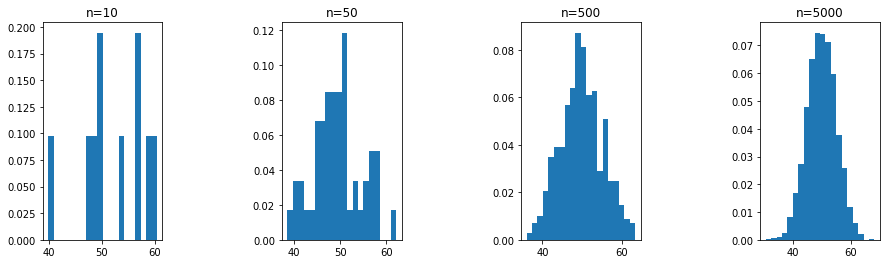

In [7]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
'''
Graphiquement, on constate que plus le nombre d'observations augmente, 
plus la courbe de fréquence se rapproche d'une courbe en cloche symétrique, 
caractéristique de la densité de probabilité de la loi normale. 
'''

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

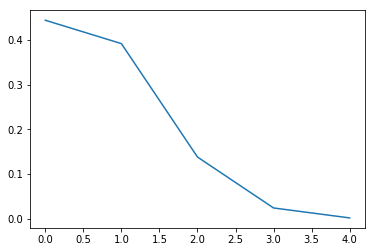

In [9]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15 # n = nombre d'observations (people who wathched the video), p = probabilité de succès (clicking an Ad in a Youtube video)

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here
#la probabilité que des personnes cliquent sur le lien (succès) diminuent avec le nombre de personnes (d'observations) qui augmentent

#### Now plot PMP with 50, 500, and 5000 visitors.

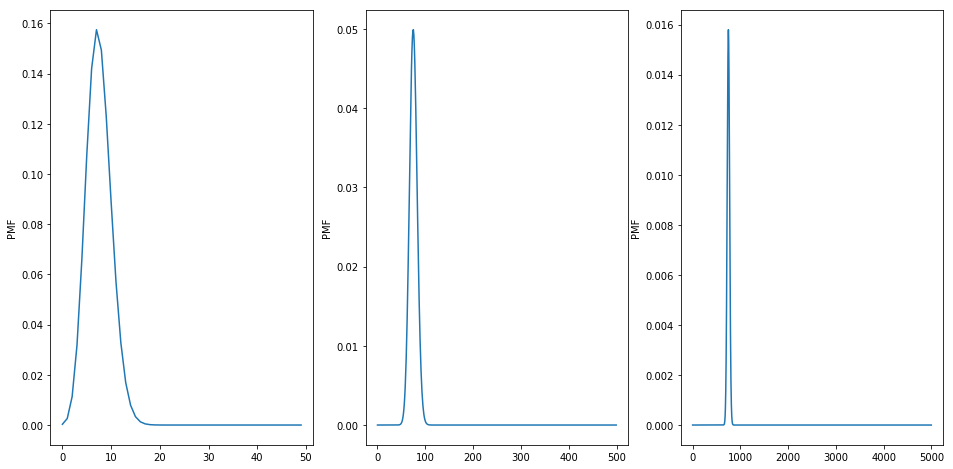

In [14]:
# Your code here

x = [range(50),range(500),range(5000)]

dist = [binom(50, p),binom(500, p),binom(5000, p)]

fig,axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = 3)
for i in range(3):
    plt.sca(axes[i])
    plt.plot(x[i], dist[i].pmf(x[i]))
    #plt.xlabel(df.iloc[:,i].name)
    plt.ylabel('PMF')

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
'''
la loi de Poisson est une loi de probabilité qui s’applique aux évènements rares. 
Il n'y a qu'un seul paramètre lambda qui sert de moyenne et de variance.
'''

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [16]:
from scipy.stats import poisson
mu=300

In [22]:
# Your code here
x=320
poisson.cdf(x, mu)

0.8809955143948803

#### What is the probability of getting 60 visits?

In [18]:
# Your code here
x=60
poisson.cdf(x,mu)

3.275053111798523e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

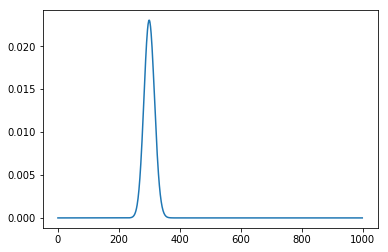

In [27]:
# your code here
N = np.arange(1000)

rv = poisson(300) #loi de poisson de paramètre lambda=300

arr = []

for n in N:
    arr.append(rv.pmf(n)) #Probability Mass Function of rv for values in N

plt.plot(arr)